In [48]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
pd.options.display.max_columns = 55
pd.options.display.float_format = lambda f : '{:,.2f}'.format(f)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (16,12)

## Overview

    - Read in Data
    - Check Distributions
    - Skew
    - Nulls
    - Obvious Outliers
    - Correlations/Collinearity

### Read In Data

In [4]:
df = pd.read_csv('creditcard.csv')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.00,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0.00,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1.00,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1.00,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2.00,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


In [5]:
# features are not normalized
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,"284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00","284,807.00"
mean,"94,813.86",0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,"47,488.15",1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,"54,201.50",-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,"84,692.00",0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,"139,320.50",1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,"172,792.00",2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,"25,691.16",1.00


Check times

In [6]:
# up to 36 transactions at once
df.Time.value_counts().unique()

array([36, 26, 25, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,
        7,  6,  5,  4,  3,  2,  1])

In [7]:
# convert to integers not floats
print((df.Time.astype(int)==df.Time).all()) # make sure we aren't altering the data
print((df.Class.astype(int) == df.Class).all())
df['Time'] = df.Time.astype(int)
df['Class'] = df.Class.astype(int)

True
True


Group columns for later reference

In [8]:
v_cols = df.columns[df.columns.str.startswith('V')].tolist()
x_cols = v_cols + ['Amount']
target_col = 'Class'

# Time will have to be dropped or dealt with separately
                    

In [9]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.36,-0.07,2.54,1.38,-0.34,0.46,0.24,0.10,0.36,0.09,-0.55,-0.62,-0.99,-0.31,1.47,-0.47,0.21,0.03,0.40,0.25,-0.02,0.28,-0.11,0.07,0.13,-0.19,0.13,-0.02,149.62,0
1,0,1.19,0.27,0.17,0.45,0.06,-0.08,-0.08,0.09,-0.26,-0.17,1.61,1.07,0.49,-0.14,0.64,0.46,-0.11,-0.18,-0.15,-0.07,-0.23,-0.64,0.10,-0.34,0.17,0.13,-0.01,0.01,2.69,0
2,1,-1.36,-1.34,1.77,0.38,-0.50,1.80,0.79,0.25,-1.51,0.21,0.62,0.07,0.72,-0.17,2.35,-2.89,1.11,-0.12,-2.26,0.52,0.25,0.77,0.91,-0.69,-0.33,-0.14,-0.06,-0.06,378.66,0
3,1,-0.97,-0.19,1.79,-0.86,-0.01,1.25,0.24,0.38,-1.39,-0.05,-0.23,0.18,0.51,-0.29,-0.63,-1.06,-0.68,1.97,-1.23,-0.21,-0.11,0.01,-0.19,-1.18,0.65,-0.22,0.06,0.06,123.50,0
4,2,-1.16,0.88,1.55,0.40,-0.41,0.10,0.59,-0.27,0.82,0.75,-0.82,0.54,1.35,-1.12,0.18,-0.45,-0.24,-0.04,0.80,0.41,-0.01,0.80,-0.14,0.14,-0.21,0.50,0.22,0.22,69.99,0


### Check Distributions

In [10]:
# Target distribution
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

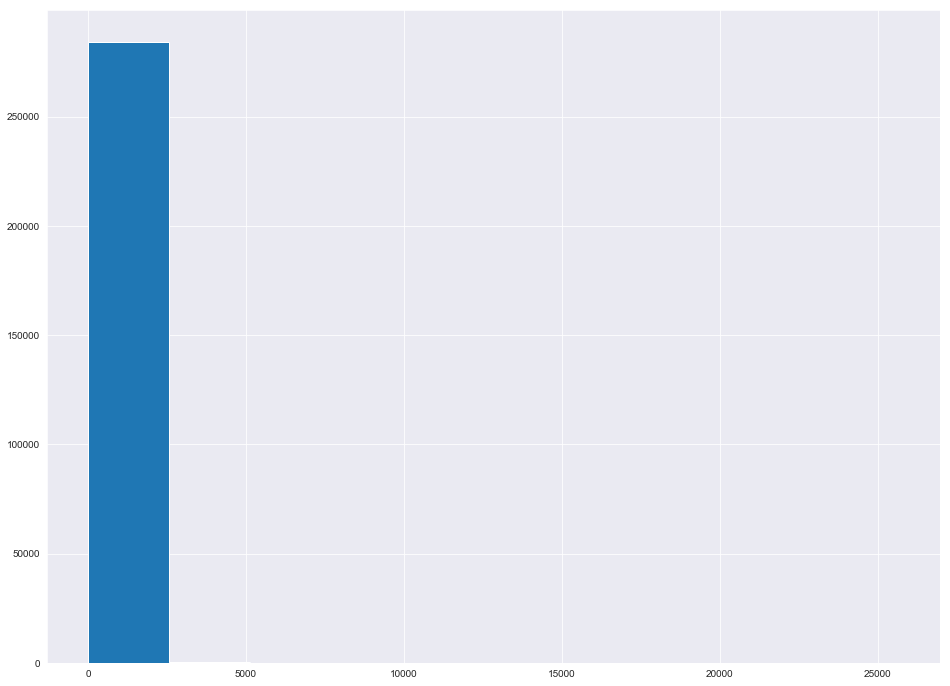

In [11]:
# Ruh Roh - outliers? Crazy Skew?
df.Amount.hist()

In [12]:
# relatively few with very large amounts
# all class 0
print(df[df.Amount>2500].shape)
df[df.Amount>2500].Class.value_counts()

(440, 31)


0    440
Name: Class, dtype: int64

/Users/rick.shapiro/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


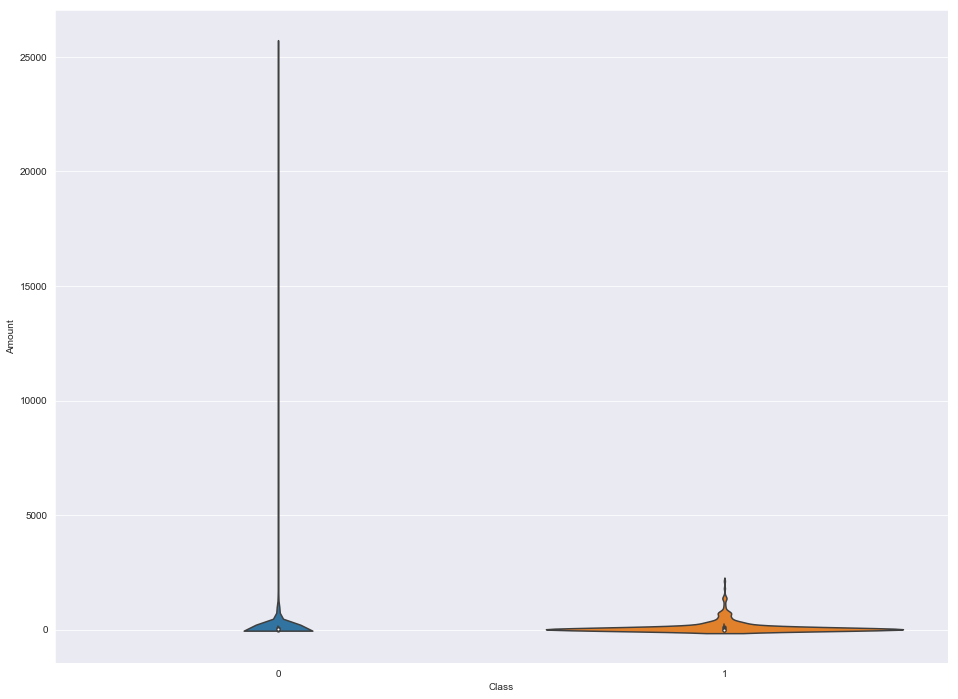

In [13]:
sns.violinplot('Class', 'Amount', data = df)

Notes on Distributions:

    - Almost No Difference on V6,V8,V13,V15, V20,V21,V22-27
    - Small differences in V1,V2,V5,V7,V9,V19,
    - Notable difference on V3,V4, V10,V11,V12, V14, V16,V17, V18
    
Major outliers in normal (non-fraudulent) charges. Often differences have to do with these outliers.
More outliers in normal charges than fraudulent ones.

Sometimes outliers make it hard to compare distributions with Violin Plots

    - V5-V8, V20, V21,V23, V27, V28, Amount

/Users/rick.shapiro/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/rick.shapiro/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


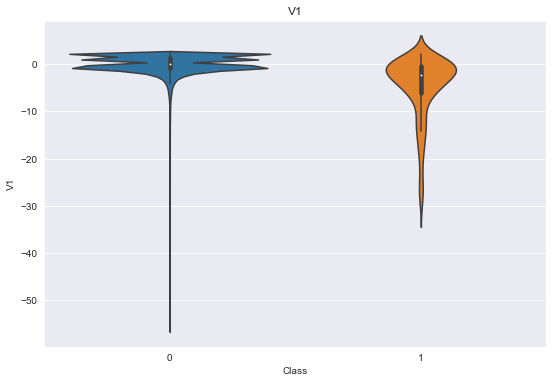

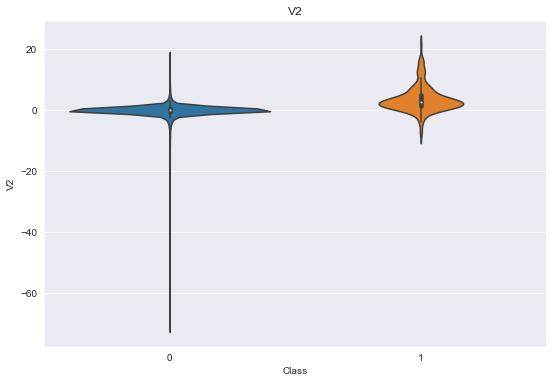

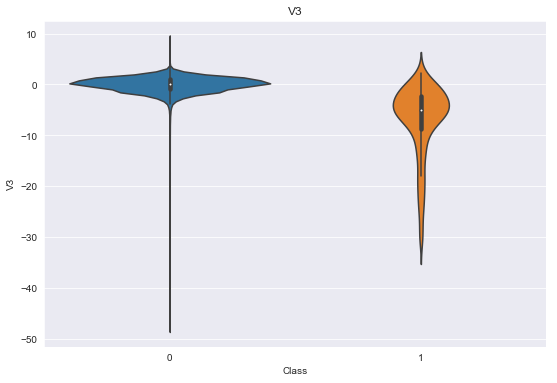

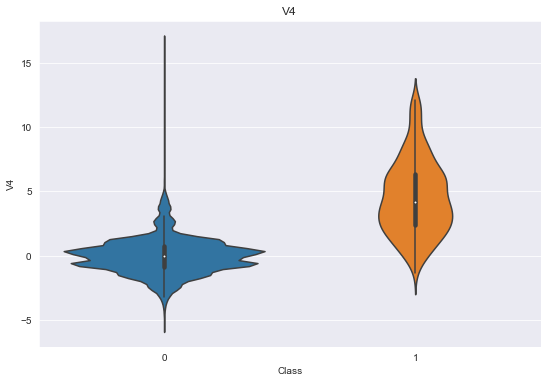

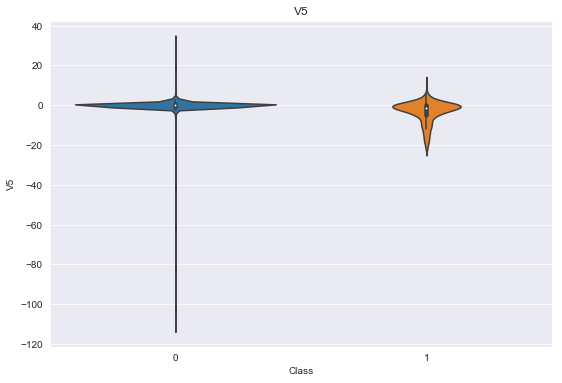

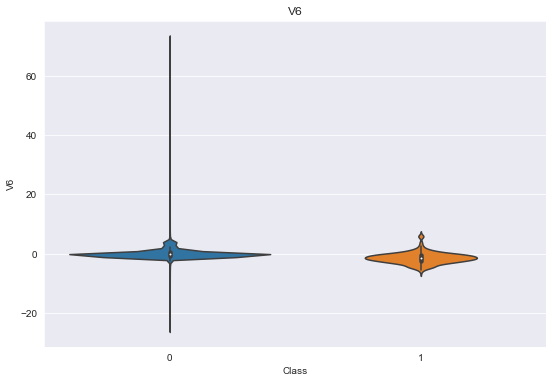

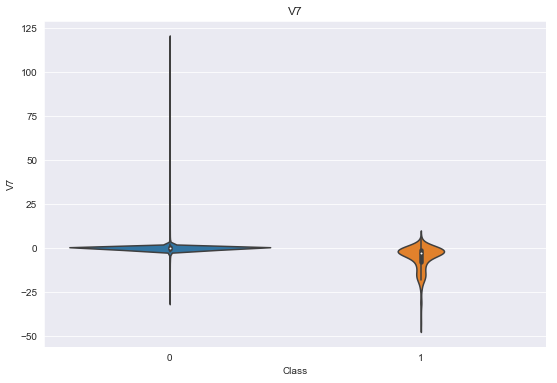

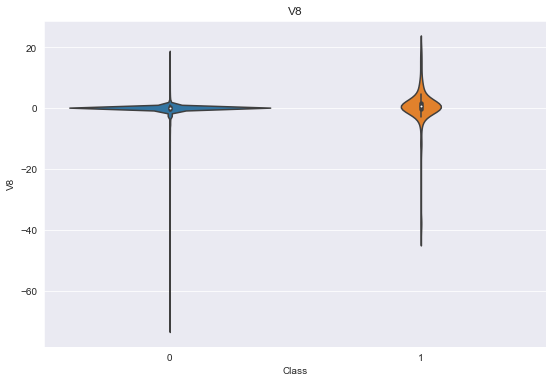

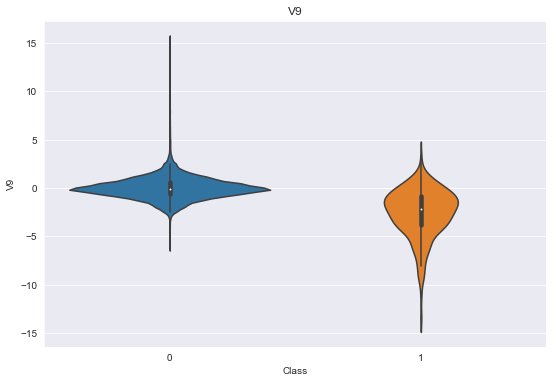

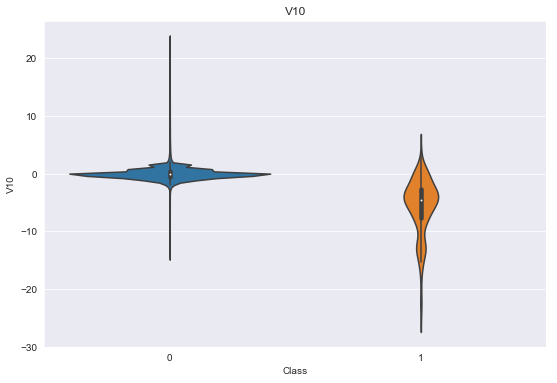

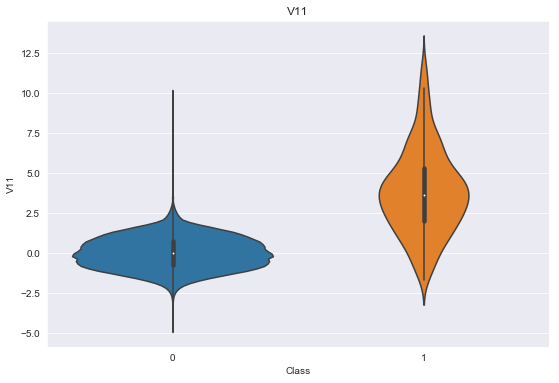

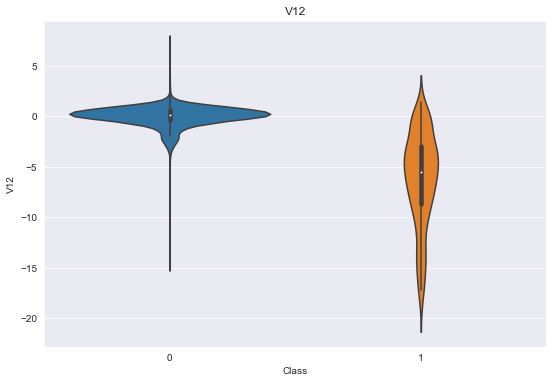

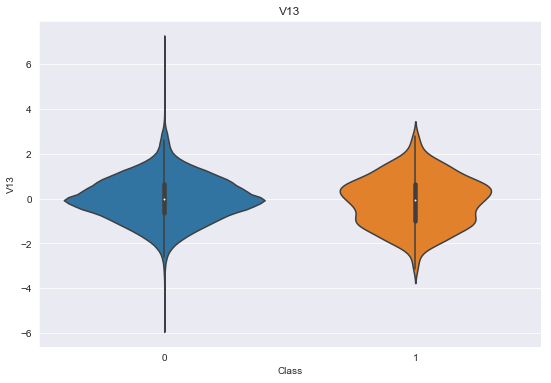

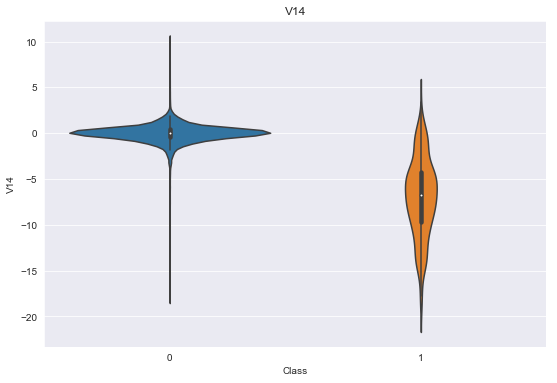

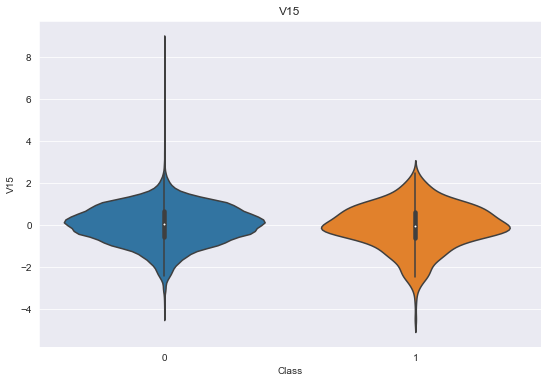

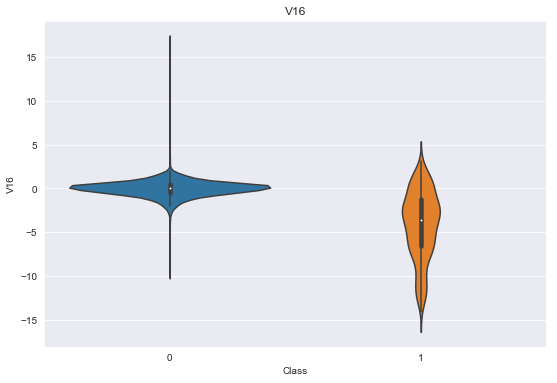

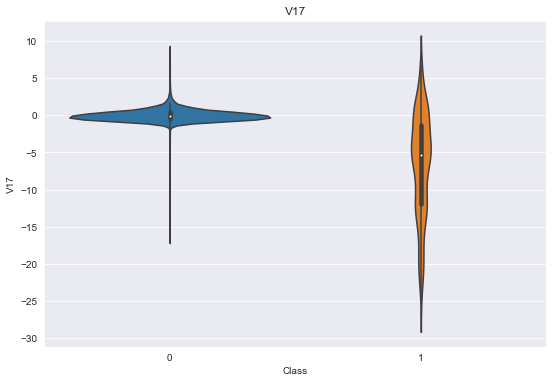

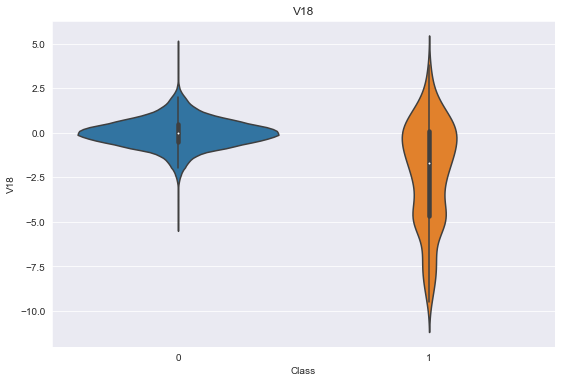

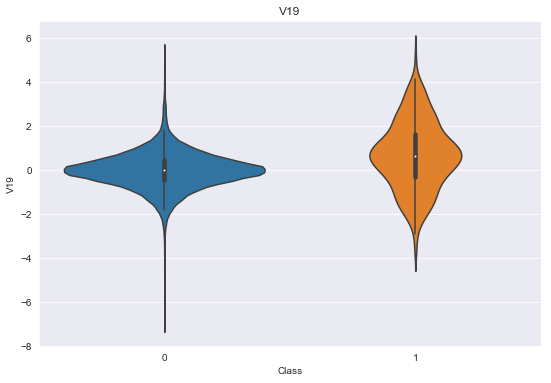

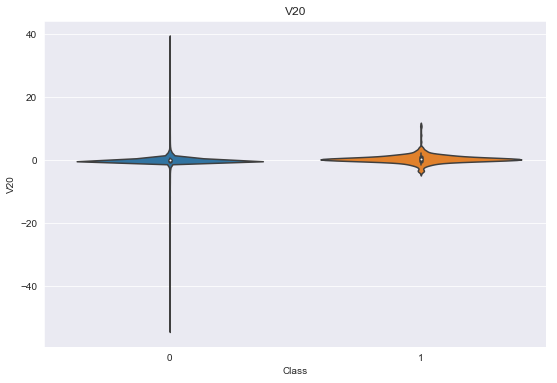

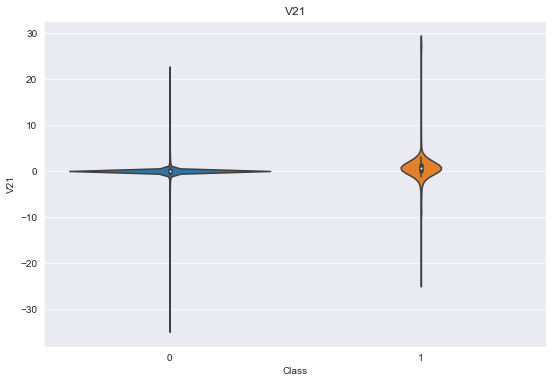

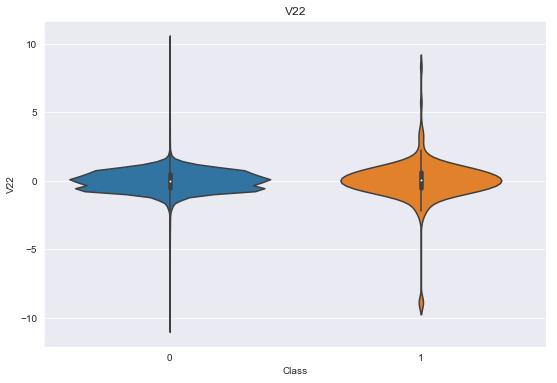

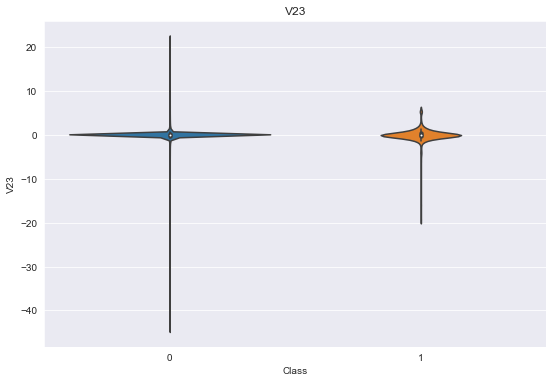

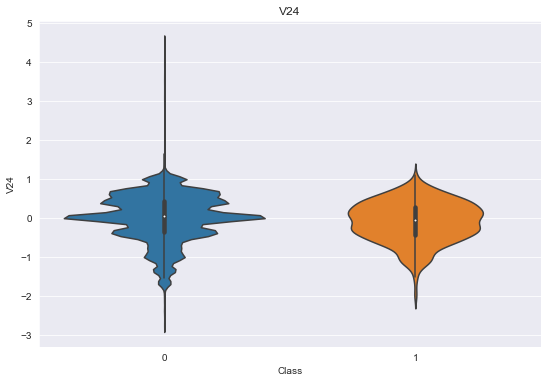

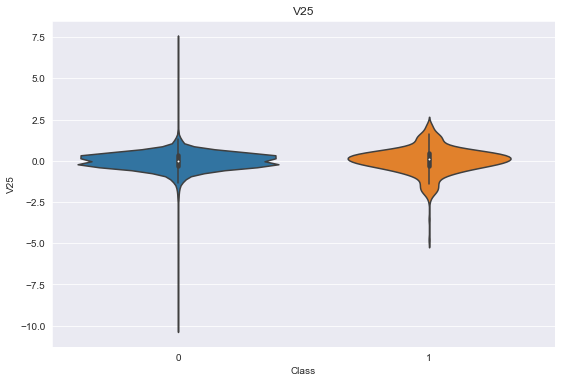

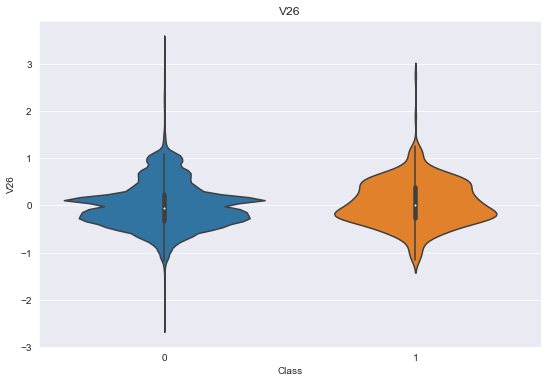

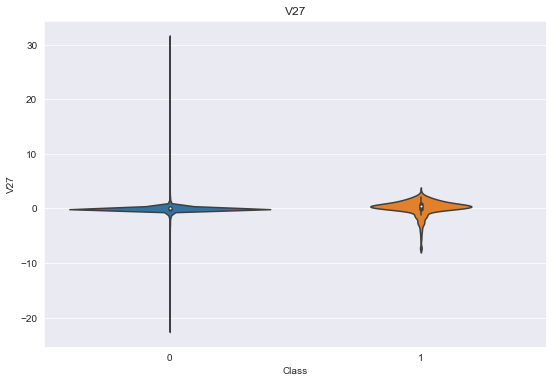

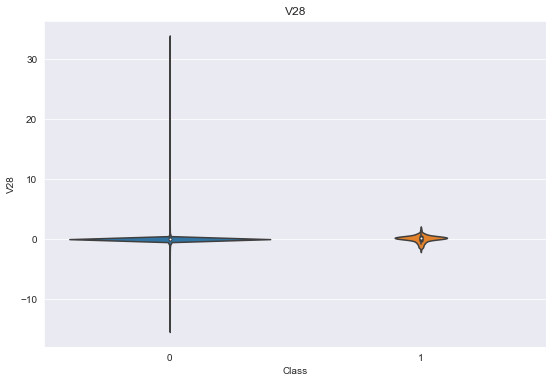

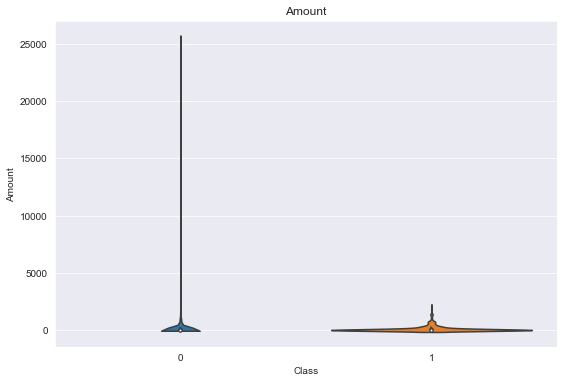

In [14]:
for c in x_cols:
    plt.figure(figsize=(9,6))
    sns.violinplot('Class', c, data = df)
    plt.title(c)

### Skew

In [15]:
df.skew()

Time     -0.04
V1       -3.28
V2       -4.62
V3       -2.24
V4        0.68
V5       -2.43
V6        1.83
V7        2.55
V8       -8.52
V9        0.55
V10       1.19
V11       0.36
V12      -2.28
V13       0.07
V14      -2.00
V15      -0.31
V16      -1.10
V17      -3.84
V18      -0.26
V19       0.11
V20      -2.04
V21       3.59
V22      -0.21
V23      -5.88
V24      -0.55
V25      -0.42
V26       0.58
V27      -1.17
V28      11.19
Amount   16.98
Class    24.00
dtype: float64

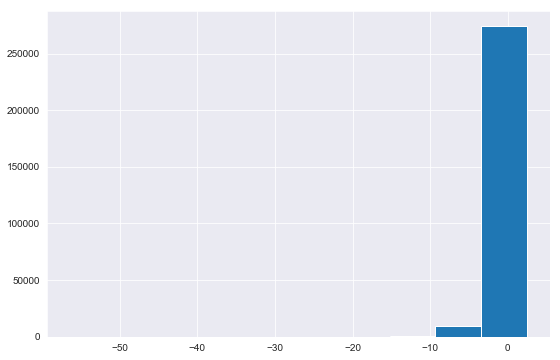

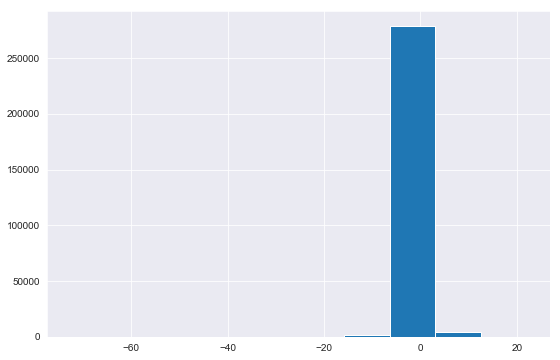

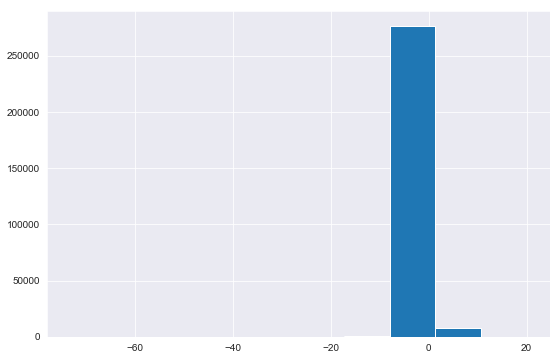

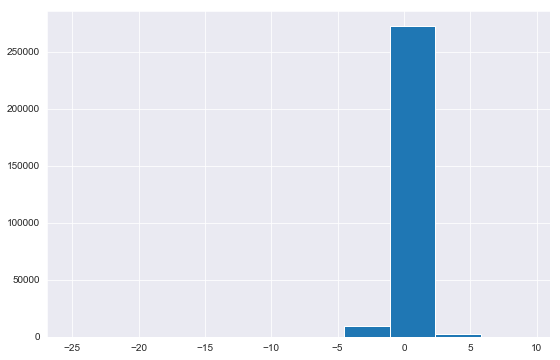

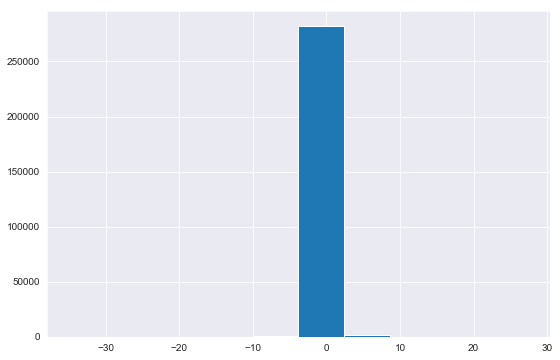

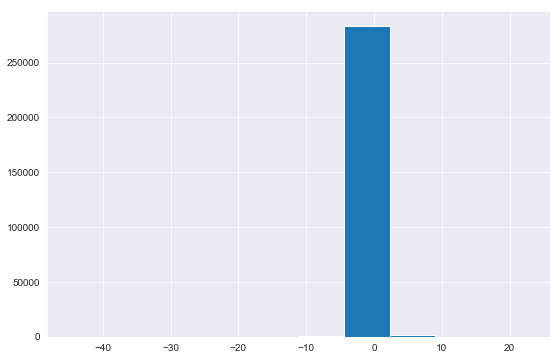

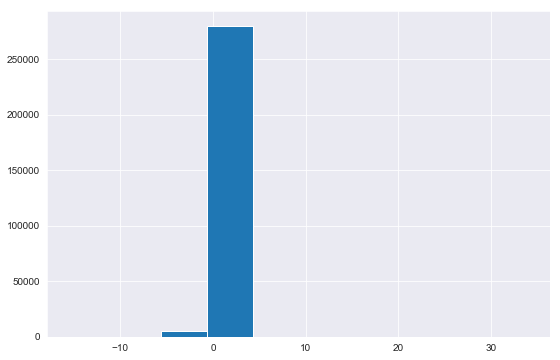

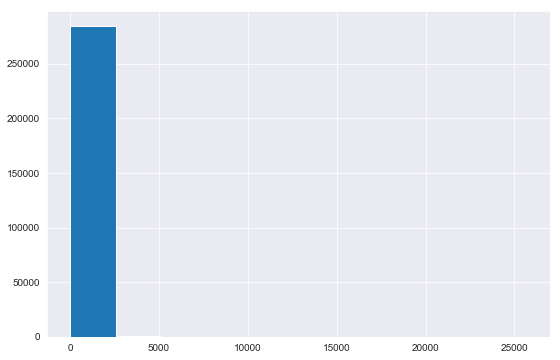

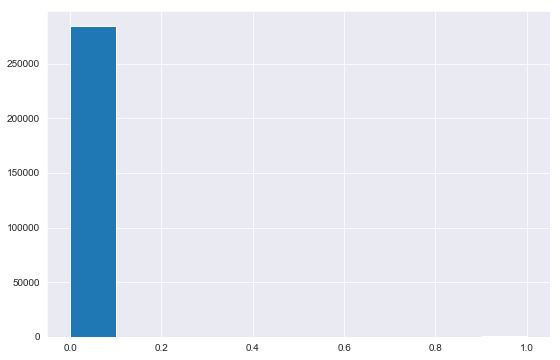

In [16]:
# may benefit from log/sqrt/boxcox transform
skewed = df.columns[df.skew().abs() > 3]
for c in skewed:
    plt.figure(figsize=(9,6))
    df[c].hist()

### Nulls

In [17]:
# Beautiful
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### Outliers

There are many outliers for many features. 

One potential option is to drop some of these where there are a lot of outliers in the _normal_ (non-fraudulent)
data so that the model doesn't get thrown off by these. This could be advantageous, for example,
if the cost of a false negative is worse than a false positive. Additionally, just from
personal experience, flagging a huge charge, even if in the end it turns out not to be fraudulent, is
still a reasonable thing to do. 

In [18]:
def is_outlier(ser, S=3, std=True):
    """
    Return boolean series for whether or not
    point is greater than S std from the mean
    or S times the iqr (if std = False) from the median
    """
    
    if std:
        return ((ser-ser.mean())/ser.std()).abs() > S
    else:
        iqr = ser.quantile(0.75) - ser.quantile(0.25)
        return ser.abs() > (ser.median() + S*iqr)

ccounts = df.Class.value_counts()
    
# data that's more than 5 standard deviations from the mean
outlier_count = pd.concat(
                          [df[is_outlier(df[c], 5)].Class.value_counts()
                             .rename(c, axis=0) for c in x_cols],axis=1)

# As Pct
outlier_pcts = pd.concat(
                         [(df[is_outlier(df[c], 5)].Class.value_counts()/ccounts)
                             .rename(c, axis=0) for c in x_cols],axis=1)


In [19]:
print('OUTLIER COUNTS AT 5 STD:')
outlier_count

OUTLIER COUNTS AT 5 STD:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,976,1213,401,94,840,360.00,1053,1767,412,1266,27,50,2.00,369,14.00,77,294,36,57,1545,1712,213,1383,108.00,213,141,1815,1183,1694
1,87,57,142,90,96,nan,146,69,60,198,133,271,nan,335,nan,209,308,139,4,7,30,11,17,nan,2,1,51,4,6


### Correlations

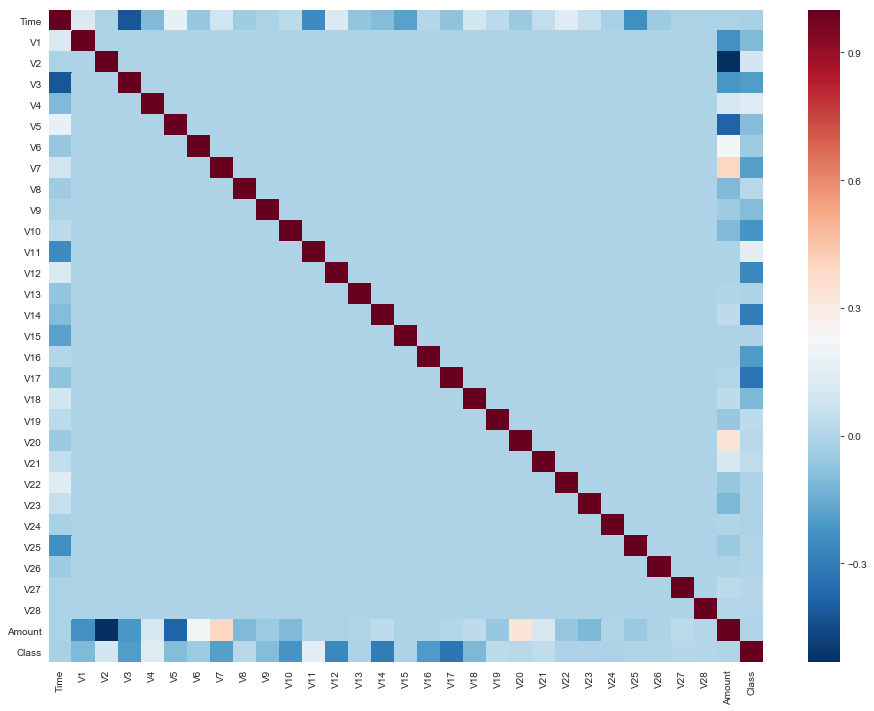

In [20]:
# Features are independent 
# unfortunately not much correlation with Target
sns.heatmap(df.corr(), cmap='RdBu_r')

### Cleaning

In [21]:
"""
Functions to 
    - Remove (non-fraudulent) outliers
    - Normalize Data
    - Deskew features
"""

from Clean_Function_Helpers import is_outlier, remove_outliers, scale_data, deskew_df


In [ ]:
# df_new = remove_outliers(df, 5, subset_rows=df.Class==0, subset_cols = df.columns.drop(['Time','Class'])).shape

In [83]:
# from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
# scaled = scale_data(df, MinMaxScaler(), df.columns.drop(['Class', 'Time']).tolist())
# dskewed = deskew_df(scaled, scaled.columns.drop(['Class', 'Time']).tolist()) #slow
# dskewed.skew() < df.skew()